# Kirkland Fig. 5.22 with the Prism Algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from ase import Atoms
import matplotlib.pyplot as plt

from tensorwaves.waves import PrismWaves
from tensorwaves.potentials import Potential
from tensorwaves.detect import RingDetector

In [126]:
L = 2
atoms = Atoms('CSiCuAuU', positions=[(5,25,L/2), (15,25,L/2), (25,25,L/2), (35,25,L/2), (45,25,L/2)], cell=(50,50,L))
potential = Potential(atoms=atoms, gpts=512, tolerance=1e-2, parametrization='kirkland', num_slices=1)

In [130]:
waves = PrismWaves(energy=200e3, cutoff=.01037, interpolation=5)
S = waves.multislice(potential)

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 1/1 


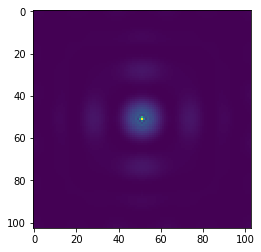

In [129]:
S.aberrations.defocus = 700
S.aberrations.Cs = -1.3e7
S.position = (45,25)
plt.imshow(S.build().image().numpy()[0])

In [124]:
detectors = RingDetector(inner=.04,outer=.2)

scan = S.linescan(detectors=[detectors], start=[0,25], end=[50,25], num_positions=150)

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 150/150 


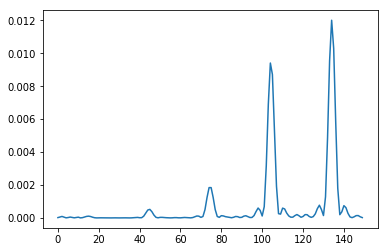

In [125]:
plt.plot(scan.numpy())